In [1]:
import os
import pandas
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np

In [3]:
def read_txt(path, align =False, rate = 1.2 ) :
    points = []
    with open(path, 'r') as f:
         for line in f :
              points.append((abs(int(line.strip().split()[0])), abs(int(line.strip().split()[-1]))))
    (left, top) = points[0]
    (right, bottom) = points[1]
    dst = []
    if align == False:
        for i in range(2,7) :
            dst.append(points[i])
    else :
         for i in range(2,7) :
            dst.append((points[i][0]-left, points[i][1]- top))
    # print(dst)
    # left, top, right, bottom = int(left/ rate), int( top / rate), int(right * rate), int(bottom * rate)
    return (left, top), (right, bottom), np.array(dst)

In [12]:
type = {
        }

In [2]:
nametype = []
imgnum = []
with open('data/txt/totalFileTrain.txt', 'r') as f:
    for line in f :
        print(line.split()[0])
        type[line.split()[0]] = int(line.split()[1])
        nametype.append(line.split()[0])
        imgnum.append(int(line.split()[1])) 

2D-Display-Pad


TypeError: 'type' object does not support item assignment

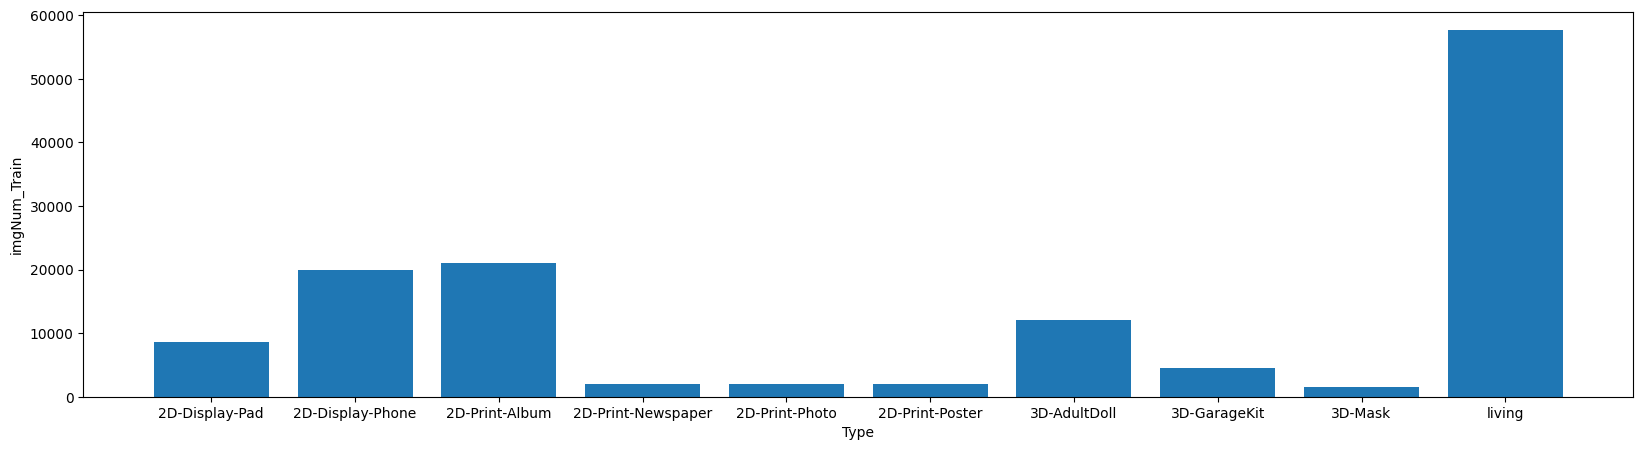

In [54]:
fig = plt.figure(figsize=(20, 5))
plt.bar(nametype,imgnum)
plt.xlabel('Type' )
plt.ylabel('imgNum_Train')
plt.show()

In [64]:
def thongke_label():
    living = 20000
    spoof = 0
    with open('data/txt/namefileTrain.txt', 'r') as f:
        for line in f :
            if 'living' in line :
                living +=1  
            else : spoof += 1
    fig = plt.figure(figsize=(2, 5))
    
    plt.bar(x = ['living','spoof'],height= [living/1000, spoof/1000])
    plt.xlabel('label' )
    plt.ylabel('imgNum_Train*1000')
    plt.show()


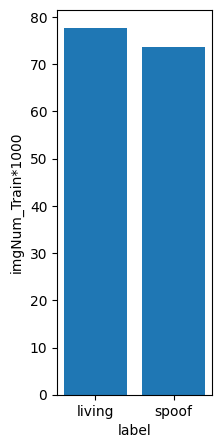

In [65]:
thongke_label()

In [31]:
def thongke_path_image():
    path_train = []
    with open('data/txt/pathImageTrain.txt', 'r') as f:
        for line in f :
            # print(line.split()[0].split('-'))
            path_train.append(line.split()[0])
            
    return path_train

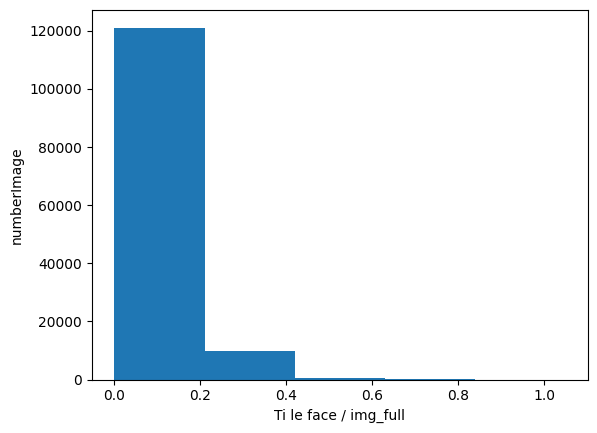

In [59]:
def thongke_rate() :
    df = pd.read_csv('data/csv/sizeTrain.csv')
    sizes_image = df['sizes_image']
    sizes_face = df['sizes_face']
    rate = []
    for i in range(len(df)) :
        size_imgH = int(sizes_image[i].split(',')[0][1:])
        size_imgW = int(sizes_image[i].split(',')[1][1:-1])
        size_faceH = int(sizes_face[i].split(',')[0][1:])
        size_faceW = int(sizes_face[i].split(',')[1][1:-1])
        rate.append((size_faceH * size_faceW) / (size_imgH * size_imgW))
    plt.hist(rate, bins=5)
    plt.xlabel('Ti le face / img_full')
    plt.ylabel('numberImage')
    plt.show()
thongke_rate()

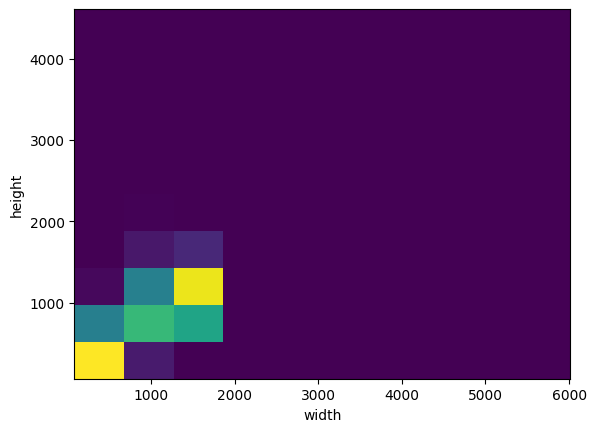

In [63]:
def thongke_rate() :
    df = pd.read_csv('data/csv/sizeTrain.csv')
    sizes_image = df['sizes_image']
    height = []
    width = []
    rate = []
    for i in range(len(df)) :
        size_imgH = int(sizes_image[i].split(',')[0][1:])
        size_imgW = int(sizes_image[i].split(',')[1][1:-1])
        height.append(size_imgH)
        width.append(size_imgW)
    plt.hist2d(x = width, y = height, bins=10)
    plt.xlabel('width')
    plt.ylabel('height')
    plt.show()
thongke_rate()

In [14]:
df = pd.read_csv('data/csv/all_image.csv')
path_image_not_train = []
for pt in df['path_all_image'] :
    if pt not in path_image :
        path_image_not_train.append(pt)


/mnt/sda1/datasets/FAS-CVPR2023/train/CVPR2023-Anti_Spoof-Challenge-Release-Data-20230209/Train/living/020735/000001.jpg
/mnt/sda1/datasets/FAS-CVPR2023/train/CVPR2023-Anti_Spoof-Challenge-Release-Data-20230209/Train/spoof/2D-Display-Pad/001185/000001.jpg


In [27]:
image  =cv2.imread('img_full_add_img_align.jpg')
# (left, top), (right, bottom), dst = read_txt('data/000001.txt')
img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
y, cr, cb = cv2.split(img_yuv)

cv2.imwrite('y_channel.png', y)

True

In [28]:
y = y.reshape((y.shape[0],y.shape[1], 1))
img_ycbcr = np.concatenate((y, y, y), axis= 2)
cv2.imwrite('img_ycbcr.jpg', img_ycbcr)

True

In [6]:
os.makedirs('nam/hihi', exist_ok=True)